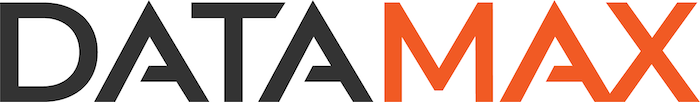

# Linear Regression with Python

In [27]:
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scikit-learn

You should consider upgrading via the '/Users/bujar/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/bujar/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/bujar/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/bujar/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/bujar/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.


In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Linear Regression Teaser

In [29]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

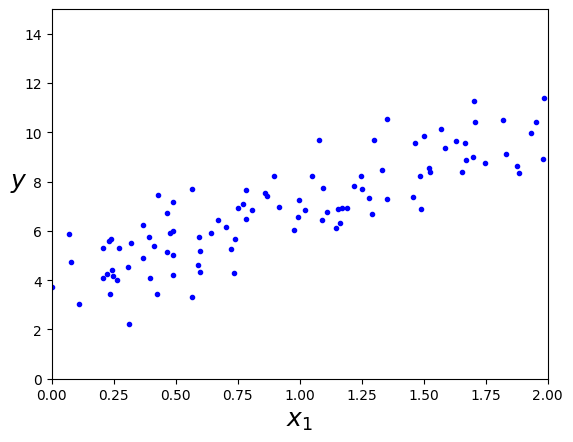

In [30]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.89644817]), array([[3.16408139]]))

In [32]:
lin_reg.intercept_

array([3.89644817])

In [33]:
b = lin_reg.intercept_[0]
m = lin_reg.coef_[0]

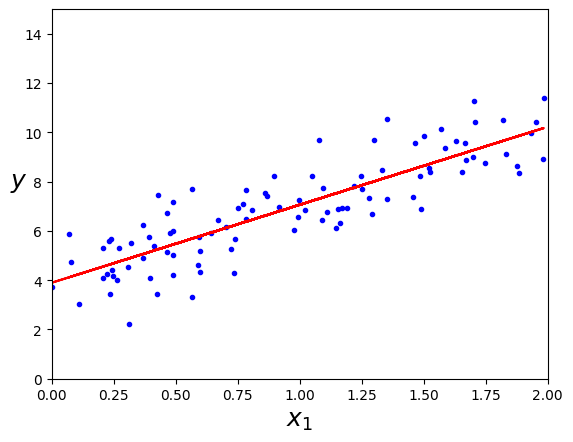

In [34]:
b = lin_reg.intercept_[0]
m = lin_reg.coef_[0]
line_X = X
line_y = X*lin_reg.coef_[0] + lin_reg.intercept_[0]
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(line_X, line_y, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression - Wine Quality

In [35]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/data-max-hq/workshop-ml-holberton/main/data/winequality-red.csv')
wine_data.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


In [36]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot: >

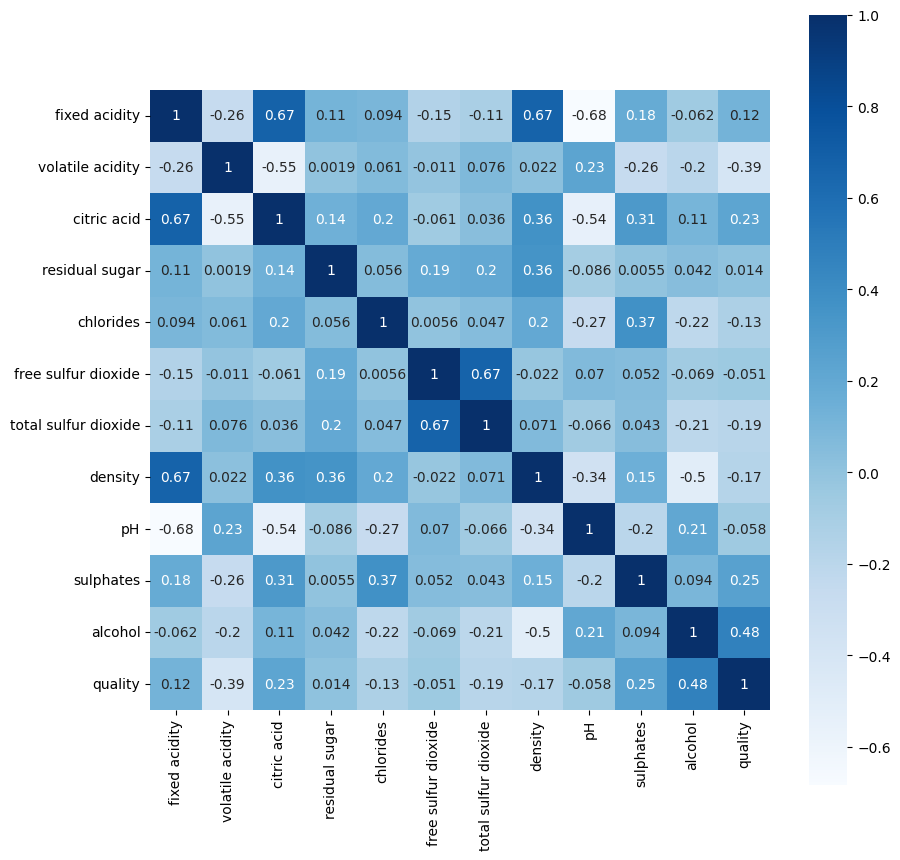

In [37]:
correlation = wine_data.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

In [38]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, train_size=0.8)

In [39]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1345,8.2,0.44,0.24,2.30,0.063,10.0,28.0,0.99613,3.25,0.53,10.2
179,8.8,0.61,0.14,2.40,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
757,8.1,0.87,0.00,2.20,0.084,10.0,31.0,0.99656,3.25,0.50,9.8
326,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5
1369,6.6,0.61,0.00,1.60,0.069,4.0,8.0,0.99396,3.33,0.37,10.4
...,...,...,...,...,...,...,...,...,...,...,...
75,8.8,0.41,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5
599,12.7,0.59,0.45,2.30,0.082,11.0,22.0,1.00000,3.00,0.70,9.3
1361,8.3,0.85,0.14,2.50,0.093,13.0,54.0,0.99724,3.36,0.54,10.1
1547,6.3,0.60,0.10,1.60,0.048,12.0,26.0,0.99306,3.55,0.51,12.1


In [40]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [41]:
regressor.intercept_

5.637663395817814

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = regressor.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.5261410255981674
0.7253557924206351


In [44]:
mae = mean_absolute_error(y_test, y_pred)

In [45]:
mae

0.5461049593684699